# Proyecto final del curso

En este cuaderno vamos a desarrollar el proyecto final del curso, el cual consiste en realizar un detector de movimientos bancarios fraudulentos.

La dataset la pueden encontrar en este [enlace](https://www.kaggle.com/isaikumar/creditcardfraud)

Para resolver el problema del desbalance entre las clases vamos a usar la ténica **SMOTE** que permite crear datos nuevos de forma sintética. De esta forma podemos balancear nuestras clases y tener un mejor resultado en el clasificador.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout # la capa de dropout nos permite igualar valores a cero en la red

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE # librería para genear datos sintéticos

import seaborn as sns # para graficas mas avanzadas

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Leer la base de datos

In [ ]:
### Para subir la base de datos

# from google.colab import files
# upload = files.upload()

In [ ]:
dataset = pd.read_csv('creditcard.csv')
dataset.head(-1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


In [ ]:
# cambiar de nombre una columna

dataset.rename(columns={'Class':'isFraud'}, inplace=True)

# % de transacciones fraudulenteas vs validas
fraud_per = dataset[dataset.isFraud == 1].isFraud.count() / dataset.isFraud.count()
print(fraud_per)

0.001727485630620034


In [ ]:
100 - fraud_per

99.99827251436938

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,isFraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(dataset.isnull().any().sum())

0


In [ ]:
# dataset.dropna(axis='columns') # para quitar valores NaN
# dataset.drop_duplicates(axis='columns') # quitar valores duplicados 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,isFraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Creando los conjuntos de entrenamiento y prueba

In [ ]:
_data = dataset # copia de la base de datos original

y = _data['isFraud'] # la columna objetivo o el valor a predecir
X = _data.drop(['isFraud'], axis=1)

In [ ]:
scaler = StandardScaler()
xscaled = scaler.fit_transform(X) # estandarizar los datos

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(xscaled, y,
                                                test_size=0.2, # distrubición 80-20
                                                random_state=0
                                                )

In [ ]:
### Aplicar solo a los datos de entrenamiento

Xsmote_train, ysmote_train = SMOTE().fit_resample(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


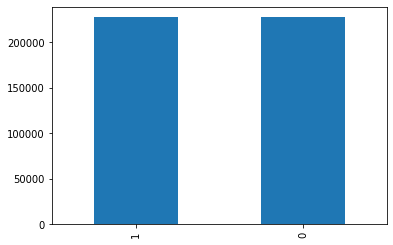

In [ ]:
pd.Series(ysmote_train).value_counts().plot(kind='bar')
plt.show()

## Crear el modelo

Cambiar la arquitectura de la red

* Cambiar el número de nodos por capas
* Pueden poner más capas
* Cambiar el número de las capas dropout

In [ ]:
model = Sequential()
model.add(Dense(128,input_dim=30,activation='relu'))
model.add(Dense(64, activation='relu')) # capa oculta
model.add(Dropout(0.2)) # capa de dropout
model.add(Dense(32, activation='relu')) # capa oculta
model.add(Dropout(0.2)) # capa de dropout
model.add(Dense(16, activation='relu')) # capa oculta
model.add(Dropout(0.2)) # capa de dropout
model.add(Dense(1,activation='sigmoid')) # Recuerden usar sigmoides para clasificación binaria ;)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0

In [ ]:
metrics = ['Accuracy','Precision','Recall']

model.compile(optimizer= 'adam',
              loss = 'binary_crossentropy',
              metrics=metrics)

In [ ]:
model.fit(Xsmote_train, ysmote_train,
          batch_size=64, # cambiar aquí
          epochs=5) # cambiar el número de épocas

Epoch 1/5
7108/7108 [==============================] - 12s 2ms/step - loss: 0.0196 - Accuracy: 0.9944 - precision: 0.9936 - recall: 0.9952
Epoch 2/5
7108/7108 [==============================] - 11s 2ms/step - loss: 0.0058 - Accuracy: 0.9987 - precision: 0.9983 - recall: 0.9992
Epoch 3/5
7108/7108 [==============================] - 11s 2ms/step - loss: 0.0041 - Accuracy: 0.9991 - precision: 0.9988 - recall: 0.9994
Epoch 4/5
7108/7108 [==============================] - 11s 2ms/step - loss: 0.0033 - Accuracy: 0.9993 - precision: 0.9990 - recall: 0.9995
Epoch 5/5
7108/7108 [==============================] - 11s 2ms/step - loss: 0.0030 - Accuracy: 0.9994 - precision: 0.9991 - recall: 0.9996


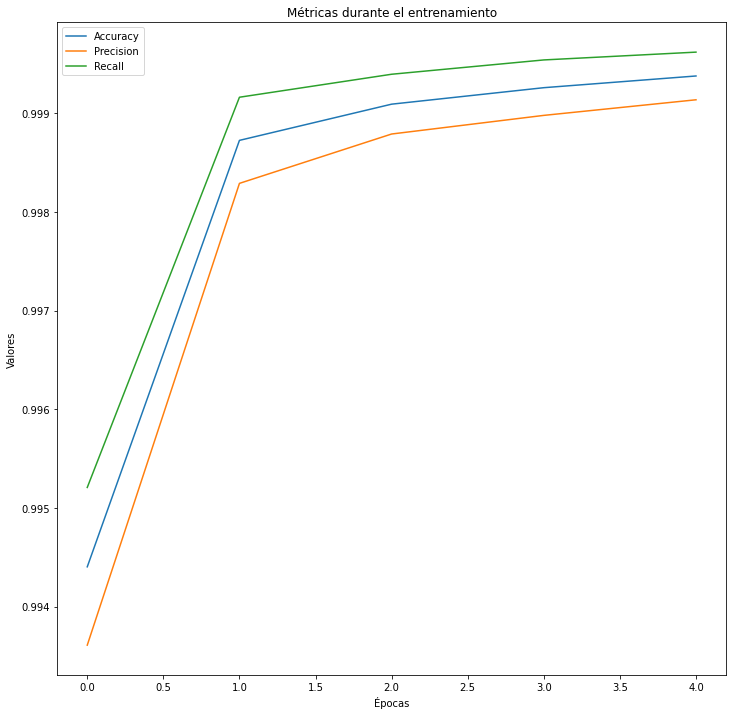

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(model.history.history['Accuracy'],label='Accuracy')
plt.plot(model.history.history['precision'],label='Precision')
plt.plot(model.history.history['recall'],label='Recall')
plt.title('Métricas durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Valores')
plt.legend()
plt.show()

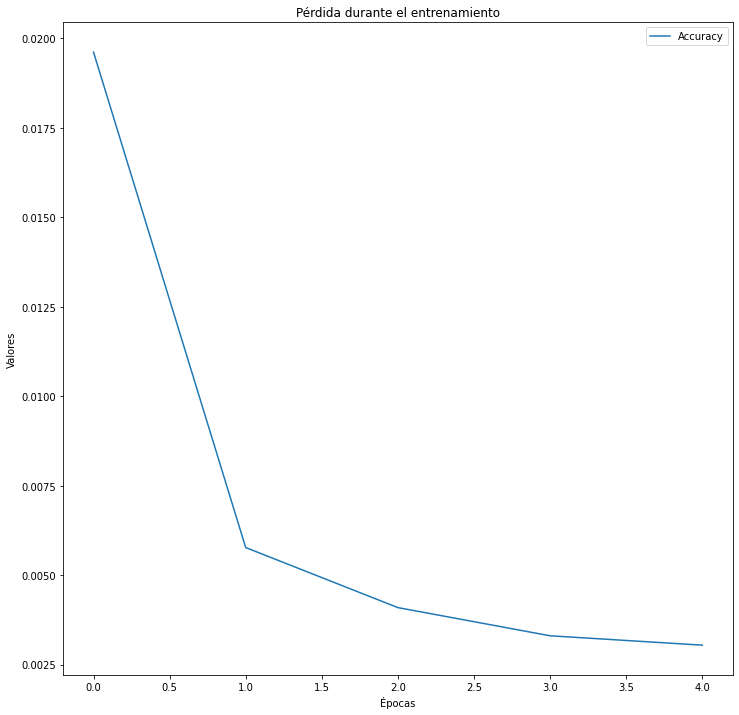

In [ ]:
# Gráfica de la función

plt.figure(figsize=(12,12))
plt.plot(model.history.history['loss'],label='Accuracy')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Valores')
plt.legend()
plt.show()

## Validación del modelo

In [ ]:
preds = model.evaluate(Xtest,ytest) # ahora sí usamos los datos de validación
print('Metricas del modelo en el conjunto de prueba')
print('Test loss: %.2f' % preds[0])
print('Test accuracy: %.2f' % (preds[1]*100))
print('Test precision: %.2f' % (preds[2]*100))
print('Test recall: %.2f' % (preds[3]*100))

1781/1781 [==============================] - 2s 898us/step - loss: 0.0121 - Accuracy: 0.9991 - precision: 0.7241 - recall: 0.8317
Metricas del modelo en el conjunto de prueba
Test loss: 0.01
Test accuracy: 99.91
Test precision: 72.41
Test recall: 83.17


## Análisis final

Tomando en consideración los resultados del entrenamiento y de la validación del modelo podemos decir que el modelo tiene un resultado aceptable.

En el caso del entrenamiento, los resultados de las métricas son más altas en la validación debido a dos factores:
* Mayor cantidad de datos
* El "balance" que realizamos a los datos

Aquí es donde se observa que el manipular los datos tienen sus pros y sus contras. En el entrenamiento generar más datos ayudará **solamente al entrenamiento del modelo**, en la validación del modelo puede salir un resultado completamente distinto.

¿Hubiera cambiado el valor de las métricas? Es dificil saberlo, pues en un problema de clasificación desbalanceada los resultados se deben tomar con un grano de sal y debemos abordarlos con mucho esceptisismo.

¿Dónde si se podría decir si funciona el modelo o no? En las pruebas de validación y mejor aún, realizando pruebas con datos que el modelo nunca ha visto.